# Recomendador de músicas do Spotify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv('/content/Dados_totais.csv')
dados_genero = pd.read_csv('/content/data_by_genres.csv')
dados_ano = pd.read_csv('/content/data_by_year.csv')

In [4]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy  explicit                      id  instrumentalness  key  liveness  \
0   0.661         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1   0.806         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   
2   0.864         0  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3    0.2090   
3   0.865         0  6ZOBP3NvffbU4SZcrnt1k6          0.000011   11    0.1680   
4   0.661         1  3yfqSUWxFvZELEM4PmlwIR          0.000000    5    0.0454   

   loudness  mode                 name  popularity  speechiness    tempo  \
0    -7.227     1               Yellow          84       0.0281  173.372   
1    -5.946     0          Ms. Jackson          80       0.2690   94.948   
2    -5.870     0           In the End          84       0.0584  105.143   
3    -5.708     0           Kryptonite          78       0.0286   99.009   
4    -4.244     0  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [5]:
dados_genero.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [6]:
dados_ano.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [7]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [8]:
dados.shape

(20311, 19)

In [9]:
dados = dados.drop(['explicit','key','mode'], axis=1)

In [10]:
dados.shape

(20311, 16)

In [11]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [12]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [13]:
dados = dados.dropna()

In [14]:
dados.shape

(20311, 16)

In [15]:
dados_genero = dados_genero.drop(['key','mode'], axis=1)
dados_genero.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   
3                      []      0.651417      0.529093  2.328809e+05  0.419146   
4              a cappella      0.676557      0.538961  1.906285e+05  0.316434   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   
1          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
2          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   
3          0.205309  0.218696 -12.288965     0.107872  112.857352  0.513604   
4          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   

   popularity  
0   27.833333  
1   52.500000  
2   48.000000  
3   20.859882  
4   45.820071

In [16]:
dados_genero.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [17]:
dados_ano['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [18]:
dados_ano = dados_ano[dados_ano['year'] >= 2000]

In [19]:
dados_ano = dados_ano.drop(['key','mode'], axis=1)
dados_ano.head()

year  acousticness  danceability    duration_ms    energy  \
79  2000      0.289323      0.590918  242724.642638  0.625413   
80  2001      0.286842      0.583318  240307.796010  0.626986   
81  2002      0.282624      0.576160  239503.283000  0.641270   
82  2003      0.256471      0.575763  244670.575230  0.660165   
83  2004      0.280559      0.567680  237378.708037  0.648868   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
79          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
80          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
81          0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
82          0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
83          0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   

    popularity  
79   46.684049  
80   48.750125  
81   48.655500  
82   48.626407  
83   49.273143

In [20]:
dados_ano = dados_ano.reset_index(drop=True)
dados_ano.head()

year  acousticness  danceability    duration_ms    energy  \
0  2000      0.289323      0.590918  242724.642638  0.625413   
1  2001      0.286842      0.583318  240307.796010  0.626986   
2  2002      0.282624      0.576160  239503.283000  0.641270   
3  2003      0.256471      0.575763  244670.575230  0.660165   
4  2004      0.280559      0.567680  237378.708037  0.648868   

   instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2          0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3          0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4          0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   

   popularity  
0   46.684049  
1   48.750125  
2   48.655500  
3   48.626407  
4   49.273143

In [21]:
dados_ano.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [22]:
import plotly.express as px

In [23]:
fig = px.line(dados_ano, x='year', y='loudness', markers=True,
              title = 'Variação do loudness por ano')
fig.show()

In [24]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_ano['year'],
                         y=dados_ano['acousticness'],
                         name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_ano['year'],
                         y=dados_ano['valence'],
                         name='Valence'))
fig.add_trace(go.Scatter(x=dados_ano['year'],
                         y=dados_ano['danceability'],
                         name='Danceability'))
fig.add_trace(go.Scatter(x=dados_ano['year'],
                         y=dados_ano['energy'],
                         name='Energy'))
fig.add_trace(go.Scatter(x=dados_ano['year'],
                         y=dados_ano['instrumentalness'],
                         name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_ano['year'],
                         y=dados_ano['liveness'],
                         name='Liveness'))
fig.add_trace(go.Scatter(x=dados_ano['year'],
                         y=dados_ano['speechiness'],
                         name='Speechiness'))
fig.show()

In [26]:
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

## Aula 02 - Clusterização por genero

In [27]:
dados_genero

genres  acousticness  danceability   duration_ms  \
0     21st century classical      0.979333      0.162883  1.602977e+05   
1                      432hz      0.494780      0.299333  1.048887e+06   
2                      8-bit      0.762000      0.712000  1.151770e+05   
3                         []      0.651417      0.529093  2.328809e+05   
4                 a cappella      0.676557      0.538961  1.906285e+05   
...                      ...           ...           ...           ...   
2968                    zolo      0.222625      0.547082  2.580991e+05   
2969                 zouglou      0.161000      0.863000  2.063200e+05   
2970                    zouk      0.263261      0.748889  3.060728e+05   
2971            zurich indie      0.993000      0.705667  1.984173e+05   
2972                  zydeco      0.421038      0.629409  1.716717e+05   

        energy  instrumentalness  liveness   loudness  speechiness  \
0     0.071317          0.606834  0.361600 -31.514333     0.040567   
1     0.450678          0.477762  0.131000 -16.854000     0.076817   
2     0.818000          0.876000  0.126000  -9.180000     0.047000   
3     0.419146          0.205309  0.218696 -12.288965     0.107872   
4     0.316434          0.003003  0.172254 -12.479387     0.082851   
...        ...               ...       ...        ...          ...   
2968  0.610240          0.143872  0.204206 -11.295878     0.061088   
2969  0.909000          0.000000  0.108000  -5.985000     0.081300   
2970  0.622444          0.257227  0.089678 -10.289222     0.038778   
2971  0.172667          0.468633  0.179667 -11.453333     0.348667   
2972  0.609369          0.019248  0.255877  -9.854825     0.050491   

           tempo   valence  popularity  
0      75.336500  0.103783   27.833333  
1     120.285667  0.221750   52.500000  
2     133.444000  0.975000   48.000000  
3     112.857352  0.513604   20.859882  
4     112.110362  0.448249   45.820071  
...          ...       ...         ...  
2968  125.494919  0.596155   33.778943  
2969  119.038000  0.845000   58.000000  
2970  101.965222  0.824111   46.666667  
2971   91.278000  0.739000    0.000000  
2972  126.366087  0.808544   30.261905  

[2973 rows x 12 columns]

In [28]:
dados_genero['genres'].nunique()

2973

In [29]:
dados_genero1 = dados_genero.drop('genres', axis=1)
dados_genero1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
#Definindo o SEED
SEED = np.random.seed(1224)

# Criando a pipeline para pre processar os dados
pca_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('PCA', PCA(n_components=2, random_state=SEED))])

In [32]:
genre_pca = pca_pipeline.fit_transform(dados_genero1)

In [33]:
projection = pd.DataFrame(data= genre_pca, columns=['x', 'y'])

In [34]:
projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

# Aula 2.2 - K-Means

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state= SEED)

kmeans_pca.fit(projection)

dados_genero['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

Initialization complete
Iteration 0, inertia 5507.93303676201
Iteration 1, inertia 4074.2061218085455
Iteration 2, inertia 3853.117729993351
Iteration 3, inertia 3730.8137511222476
Iteration 4, inertia 3656.4350798758005
Iteration 5, inertia 3605.1672109118217
Iteration 6, inertia 3571.900679459396
Iteration 7, inertia 3550.902990132184
Iteration 8, inertia 3533.014082301011
Iteration 9, inertia 3519.6543584444535
Iteration 10, inertia 3512.266969286946
Iteration 11, inertia 3506.581065912211
Iteration 12, inertia 3505.0339436455542
Iteration 13, inertia 3504.719806704714
Converged at iteration 13: center shift 0.0001349294269498438 within tolerance 0.00027098868470996494.
Initialization complete
Iteration 0, inertia 4488.249225801363
Iteration 1, inertia 3841.7316176370614
Iteration 2, inertia 3659.1723484081986
Iteration 3, inertia 3620.3407140960576
Iteration 4, inertia 3600.7338824386566
Iteration 5, inertia 3577.5008680331675
Iteration 6, inertia 3567.5388945887175
Iteration 7, in

In [37]:
projection

x         y  cluster_pca
0     5.910268 -0.011146            2
1     2.787093  4.498483            2
2    -0.757538 -1.258495            4
3     1.020521 -0.931690            0
4     0.753911 -0.999861            0
...        ...       ...          ...
2968 -0.475136 -0.017126            1
2969 -3.026756 -1.304983            4
2970 -0.832511 -1.089726            4
2971  1.774790 -3.695233            0
2972 -1.028069 -1.390709            4

[2973 rows x 3 columns]

In [38]:
projection['genero'] = dados_genero['genres']
projection.head()

x         y  cluster_pca                  genero
0  5.910268 -0.011146            2  21st century classical
1  2.787093  4.498483            2                   432hz
2 -0.757538 -1.258495            4                   8-bit
3  1.020521 -0.931690            0                      []
4  0.753911 -0.999861            0              a cappella

# Aula 2.3 - Plotando a clustering


In [39]:
# plotando a clustering
fig = px.scatter(
    projection, x='x', y='y', color='cluster_pca', hover_data=['x','y','genero']
)
fig.show()

# Aula 3 - Clustering por música

# Aula 3.1 - Redução de dimensionalidade

In [40]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [41]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [42]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
ohe = OneHotEncoder(sparse=False)
colunas_ohe = ohe.fit_transform(dados[['artists']])
nomes_colunas = ohe.get_feature_names_out()

In [45]:
dados2 = dados.drop('artists', axis=1)

In [46]:
df_artists_dummies = pd.DataFrame(colunas_ohe, columns = nomes_colunas)
df_artists_dummies

artists_$NOT  artists_$uicideBoy$  artists_*NSYNC  artists_2 Chainz  \
0               0.0                  0.0             0.0               0.0   
1               0.0                  0.0             0.0               0.0   
2               0.0                  0.0             0.0               0.0   
3               0.0                  0.0             0.0               0.0   
4               0.0                  0.0             0.0               0.0   
...             ...                  ...             ...               ...   
20306           0.0                  0.0             0.0               0.0   
20307           0.0                  0.0             0.0               0.0   
20308           0.0                  0.0             0.0               0.0   
20309           0.0                  0.0             0.0               0.0   
20310           0.0                  0.0             0.0               0.0   

       artists_21 Savage  artists_2Pac  artists_3 Doors Down  artists_311  \
0                    0.0           0.0                   0.0          0.0   
1                    0.0           0.0                   0.0          0.0   
2                    0.0           0.0                   0.0          0.0   
3                    0.0           0.0                   1.0          0.0   
4                    0.0           0.0                   0.0          0.0   
...                  ...           ...                   ...          ...   
20306                0.0           0.0                   0.0          0.0   
20307                0.0           0.0                   0.0          0.0   
20308                0.0           0.0                   0.0          0.0   
20309                0.0           0.0                   0.0          0.0   
20310                0.0           0.0                   0.0          0.0   

       artists_3OH!3  artists_5 Seconds of Summer  ...  artists_Zara Larsson  \
0                0.0                          0.0  ...                   0.0   
1                0.0                          0.0  ...                   0.0   
2                0.0                          0.0  ...                   0.0   
3                0.0                          0.0  ...                   0.0   
4                0.0                          0.0  ...                   0.0   
...              ...                          ...  ...                   ...   
20306            0.0                          0.0  ...                   0.0   
20307            0.0                          0.0  ...                   0.0   
20308            0.0                          0.0  ...                   0.0   
20309            0.0                          0.0  ...                   0.0   
20310            0.0                          0.0  ...                   0.0   

       artists_Zedd  artists_alt-J  artists_blackbear  artists_blink-182  \
0               0.0            0.0                0.0                0.0   
1               0.0            0.0                0.0                0.0   
2               0.0            0.0                0.0                0.0   
3               0.0            0.0                0.0                0.0   
4               0.0            0.0                0.0                0.0   
...             ...            ...                ...                ...   
20306           0.0            0.0                0.0                0.0   
20307           0.0            0.0                0.0                0.0   
20308           0.0            0.0                0.0                0.0   
20309           0.0            0.0                0.0                0.0   
20310           0.0            0.0                0.0                0.0   

       artists_deadmau5  artists_for KING & COUNTRY  artists_fun.  \
0                   0.0                         0.0           0.0   
1                   0.0                         0.0           0.0   
2                   0.0                         0.0           0.

In [47]:
dados_musicas_dummies = pd.concat([dados2, df_artists_dummies], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                      0.0           0.0            0.0                0.0   
1                      0.0           0.0            0.0                0.0   
2                      0.0           0.0            0.0                0.0   
3                      0.0           0.0            0.0                0.0   
4                      0.0           0.0            0.0                0.0   
...                    ...           ...            ...                ...   
20306                  0.0           0.0            0.0                0.0   
20307                  0.0           0.0            0.0                0.0   
20308                  0.0           0.0            0.0                0.0   
20309                  0.0           0.0            0.0                0.0   
20310                  0.0           0.0            0.0                0.0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                   0.0               0.0                         0.0   
1                   0.0               0.0                         0.0   
2                   0.0               0.0                         0.0   
3                   0.0               0.0                         0.0   
4                   0.0               0.0                         0.0   
...                 ...               ...                         ...   
20306               0.0               0.0                         0.0   
20307               0.0               0.0                         0.0   
20308               0.0               0.0                         0.0   
20309               0.0               0.0                         0.0   
20310               0.0               0.0                         0.0   

       artists_fun.  artists_girl in red  artists_iann dior  
0               0.0                  0.0                0.0  
1               0.0                  0.0                0.0  
2               0.0                  0.0                0.0  
3               0.0                  0.0                0.0  
4               0.0                  0.0                0.0  
...             ...            

In [48]:
# Retirando colunas de strings
char_cols = dados_musicas_dummies.select_dtypes('object').columns
dados_musicas_dummies = dados_musicas_dummies.drop(char_cols, axis=1)

In [49]:
# Aplicando a pipeline novamente
pca_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('PCA', PCA(n_components=0.7, random_state=SEED))])

music_pca = pca_pipeline.fit_transform(dados_musicas_dummies)
projection_music = pd.DataFrame(data=music_pca)

In [50]:
projection_music

0         1         2         3         4         5         6    \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

            7         8         9    ...       602       603       604  \
0     -0.479171 -2.700668  2.109956  ...  0.002516  0.002097 -0.019072   
1      0.821698 -1.716897  0.252498  ...  0.036047 -0.026825 -0.031678   
2      1.839192 -1.562236  1.410677  ... -0.013908  0.007214  0.003084   
3      1.135529 -1.343893  1.020964  ...  0.038784  0.020814 -0.046126   
4      0.479412 -2.125376  0.389565  ...  0.006291  0.003111 -0.009148   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.155320  0.335148  0.103481   
20307 -1.475719 -0.338390  0.272129  ...  0.264741  0.210461 -0.094337   
20308  0.972512  0.900317 -0.674016  ...  0.263781 -0.189241  0.213993   
20309 -0.633245  0.280076  0.521145  ...  0.398941  0.560966 -0.437674   
20310  0.567041 -1.026283  0.266124  ...  0.005936  0.003050 -0.009230   

            605       606       607       608           609           610  \
0     -0.009111  0.005154 -0.034027 -0.032617 -2.448503e-12  5.916867e-12   
1     -0.031986  0.029708 -0.016322 -0.030234  1.249715e-13 -1.457579e-12   
2      0.017097  0.017361 -0.010979 -0.012781 -1.126295e-12  5.280977e-13   
3      0.089337  0.164777 -0.064148 -0.040911  1.258083e-12  4.310193e-12   
4     -0.011937 -0.004081 -0.017478 -0.010033 -2.516703e-13  1.619560e-12   
...         ...       ...       ...       ...           ...           ...   
20306 -0.235355 -0.054256  0.016922 -0.125947 -1.236427e-11  1.397844e-11   
20307 -0.183026  0.074605  0.005622  0.000054 -1.258064e-11  2.210559e-11   
20308 -0.033420 -0.157564  0.213849 -0.065180  2.362917e-11 -9.586614e-12   
20309 -0.784640  0.080684  0.038379  0.108493 -2.187180e-12  5.916833e-11   
20310 -0.012069 -0.003818 -0.017675 -0.010372 -2.696247e-13  1.641153e-12   

                611  
0      3.121908e-12  
1     -2.040535e-13  
2      4.085243e-13  
3     -4.043356e-13  
4      3.676579e-13  
...             ...  
20306  1.774074e-11  
20307 -6.425509e-12  
20308  9.207036e-12  
20309 -8.516342e-12  
20310  3.925290e-13  

[20311 rows x 612 columns]

# 3.2 Aplicação do K-means

In [51]:
kmeans_pca = KMeans(n_clusters=50, verbose=False, random_state= SEED)

kmeans_pca.fit(projection_music)

dados['cluster_pca'] = kmeans_pca.predict(projection_music)
projection_music['cluster_pca'] = kmeans_pca.predict(projection_music)
projection_music['artists_song'] = dados['artists_song']
projection_music['artists'] = dados['artists']


In [52]:
projection_music

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617 -2.448503e-12  5.916867e-12  3.121908e-12            8   
1     -0.030234  1.249715e-13 -1.457579e-12 -2.040535e-13            8   
2     -0.012781 -1.126295e-12  5.280977e-13  4.085243e-13            9   
3     -0.040911  1.258083e-12  4.310193e-12 -4.043356e-13            8   
4     -0.010033 -2.516703e-13  1.619560e-12  3.676579e-13            8   
...         ...           ...           ...           ...          ...   
20306 -0.125947 -1.236427e-11  1.397844e-11  1.774074e-11            4   
20307  0.000054 -1.258064e-11  2.210559e-11 -6.425509e-12            4   
20308 -0.065180  2.362917e-11 -9.586614e-12  9.207036e-12            4   
20309  0.108493 -2.187180e-12  5.916833e-11 -8.516342e-12            4   
20310 -0.010372 -2.696247e-13  1.641153e-12  3.925290e-13            4   

                             artists_song        artists  
0                       Coldplay - Yellow       Coldplay  
1                   OutKast - Ms. Jackson        OutKast  
2                Linkin Park - In the End    Linkin Park  
3               3 Doors Down - Kryptonite   3 Doors Down  
4            Eminem - The Real Slim Shady         Eminem  
...                                   ...            ...  
20306      Bazzi - I Don't Think I'm Okay          Bazzi  
20307  Bryson Tiller - Timeless Interlude  Bryson Tiller  
20308              Fleet Foxes - Sunblind    Fleet Foxes  
20309      Gunna - NASTY GIRL / ON CAMERA          Gunna  
20310                   Eminem - Darkness         Eminem  

[20311 rows x 615 columns]

In [53]:
# plotando a clustering
fig = px.scatter(
    projection_music, x= 0,
     y= 1, color='cluster_pca', hover_data=[0, 1,'artists_song']
)
fig.show()

In [54]:
# Verificando se as colunas explicam 70% das variáveis conforme setado
pca_pipeline[1].explained_variance_ratio_.sum()

0.700000846318703

# Aula 4 - Sistemas de Recomendação

## 4.1 - Recomendação da música

In [55]:
nome_musica = 'Ed Sheeran - Shape of You'

In [56]:
projection_music.head()

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2 -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3 -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4 -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   
1  0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322 -0.030234   
2  1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979 -0.012781   
3  1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148 -0.040911   
4  0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478 -0.010033   

            609           610           611  cluster_pca  \
0 -2.448503e-12  5.916867e-12  3.121908e-12            8   
1  1.249715e-13 -1.457579e-12 -2.040535e-13            8   
2 -1.126295e-12  5.280977e-13  4.085243e-13            9   
3  1.258083e-12  4.310193e-12 -4.043356e-13            8   
4 -2.516703e-13  1.619560e-12  3.676579e-13            8   

                   artists_song       artists  
0             Coldplay - Yellow      Coldplay  
1         OutKast - Ms. Jackson       OutKast  
2      Linkin Park - In the End   Linkin Park  
3     3 Doors Down - Kryptonite  3 Doors Down  
4  Eminem - The Real Slim Shady        Eminem  

[5 rows x 615 columns]

In [57]:
cluster = projection_music[projection_music['artists_song'] == nome_musica]['cluster_pca']
musicas_recomendadas = projection_music[projection_music['cluster_pca'] == cluster.item()].iloc[:,[0,1,-2]]

In [58]:
musicas_recomendadas

0         1                                 artists_song
397    1.500328 -0.872666             Alicia Keys - If I Ain't Got You
431    0.401485 -0.606265                         Michael Bublé - Sway
525   -0.858857 -1.062990  Ciara - One, Two Step (feat. Missy Elliott)
557   -1.352910 -0.024560          Ciara - Goodies (feat. Petey Pablo)
576    1.155518  0.412391                             Sia - Breathe Me
...         ...       ...                                          ...
20306  1.346699 -2.775889               Bazzi - I Don't Think I'm Okay
20307  1.269387 -2.444619           Bryson Tiller - Timeless Interlude
20308  0.781916 -1.164865                       Fleet Foxes - Sunblind
20309  0.002454 -3.056407               Gunna - NASTY GIRL / ON CAMERA
20310 -0.957008 -1.208016                            Eminem - Darkness

[7527 rows x 3 columns]

In [59]:
from sklearn.metrics.pairwise import euclidean_distances

x_musica = projection_music[projection_music['artists_song'] == nome_musica][0].item()
y_musica = projection_music[projection_music['artists_song'] == nome_musica][1].item()

# Distancias euclidianas

distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica, y_musica]])
musicas_recomendadas['distancias'] = distancias
musicas_recomendadas['id'] = dados['id']

recomendadas = musicas_recomendadas.sort_values('distancias').head(10)
recomendadas


0         1                                       artists_song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
2826  -0.831891 -2.941406                       Juice WRLD - Hear Me Calling   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
17093 -0.792448 -2.974369                        Joyner Lucas - Will - Remix   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
17156 -0.846706 -2.863550              KYLE - What It Is (feat. Chris Brown)   
11687 -0.775137 -2.874971              Lil Mosey - G Walk (with Chris Brown)   

       distancias                      id  
2463     0.000000  7qiZfU4dY1lWllzX7mPBI3  
2826     0.005226  13ZyrkCDmRz5xY3seuAWYk  
2942     0.045213  3Z8FwOEN59mRMxDCtb8N0A  
17093    0.048920  6WI33r2QRxyxttn3KH0XkC  
5371     0.049025  1EWkw4Fa6IlnsAihLUlFFM  
15388    0.059533  3QqJ44HiM84iyZS0G2IKIP  
5271     0.059728  4vUmTMuQqjdnvlZmAH61Qk  
18479    0.077472  2wOXxtHZgRkkrkEbKLzzqs  
17156    0.078662  26rIWI1QTPClaOOI4Kbxhe  
11687    0.082908  7BxpObs6K7Yio5lVb3sMYX

In [60]:
! pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.8/237.8 KB 14.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [61]:
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [62]:
scope = 'user-library-read playlist-modify-private'
OAuth = SpotifyOAuth(
    scope = scope,
    redirect_uri='http://localhost:5000/callback',
    client_id = '4b72dbe8f84440a292c5b4152eaf177f',
    client_secret= 'de1a12b979014a188f99c6ac6963c065'
    )

In [63]:
import spotipy
client_credentials_manager = SpotifyClientCredentials(
                                                           client_id = '4b72dbe8f84440a292c5b4152eaf177f',
                                                           client_secret= 'de1a12b979014a188f99c6ac6963c065' 
                                                        )
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# Aula 4.3 Imagem album

In [64]:
import matplotlib.pyplot as plt
from skimage import io

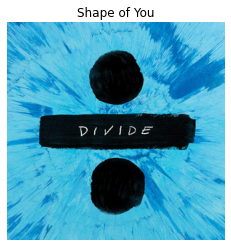

In [65]:
id = recomendadas[recomendadas['artists_song'] == nome_musica]['id'].item()
track = sp.track(id)
url = track['album']['images'][1]['url']
name = track['name']
image = io.imread(url)

plt.imshow(image)
plt.axis('off')
plt.title(name)
plt.show()

# Aula 5 - Recomendador

In [77]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])
  return name, url

In [79]:
name, url = recommend_id(recomendadas['id'])

## Aula 5.2 - Gerando imagens da playlist

In [81]:
def visualize_songs(name, url):
  plt.figure(figsize=(15,10))
  columns = 5

  for i, u in enumerate(url):
    # definindo as posições dos plots
    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
    # Lendo as imagens da URL
    image = io.imread(u)
    # Mostrando as imagens das URLs
    plt.imshow(image)
    # Remover eixos visiveis
    ax.get_yaxis().set_visible(False)
    # Deixando os pontos do eixo x e y em branco
    plt.xticks(color='white', fontsize= 0.1)
    plt.yticks(color='white', fontsize= 0.1)
    # Colocando o nome das músicas
    plt.xlabel(name[i], fontsize= 8)
    # Faz com que todos os paramentros se ajustem ao tamanho da imagem definido
    plt.tight_layout(h_pad=0.7, w_pad=0)
    # Ajusta os parametros de layout da imagem
    plt.subplots_adjust(wspace=None, hspace=None)
    # Remove os ticks mas não remove o xlabel
    plt.tick_params(bottom=False)
    # Tirar a grade
    plt.grid(visible = None)
  # Mostra os gráficos
  plt.show()

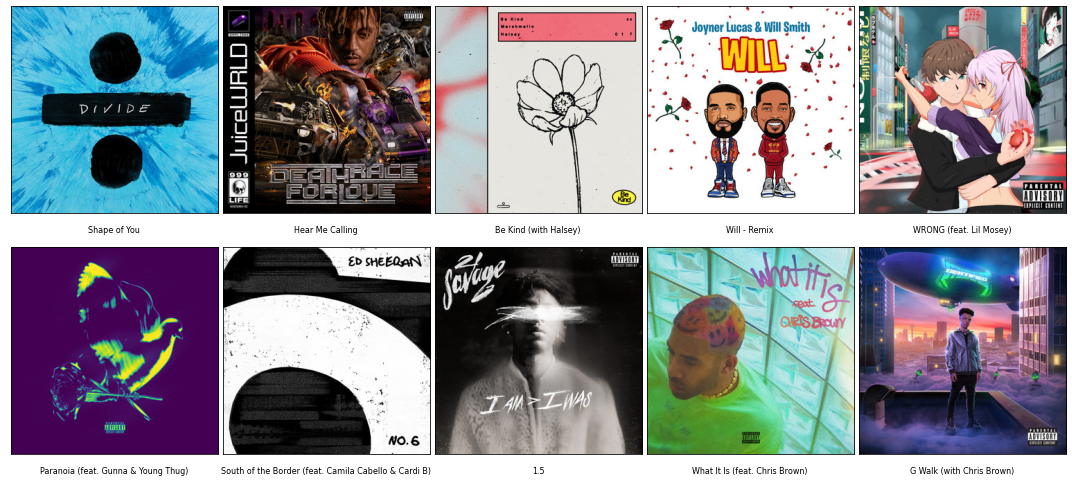

In [82]:
visualize_songs(name, url)

# Aula 6 - Fazendo função final

In [86]:
def recomendador(nome_musica):
  cluster = projection_music[projection_music['artists_song'] == nome_musica]['cluster_pca']
  musicas_recomendadas = projection_music[projection_music['cluster_pca'] == cluster.item()].iloc[:,[0,1,-2]]
  x_musica = projection_music[projection_music['artists_song'] == nome_musica][0].item()
  y_musica = projection_music[projection_music['artists_song'] == nome_musica][1].item()

  # Distancias euclidianas

  distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica, y_musica]])
  musicas_recomendadas['distancias'] = distancias
  musicas_recomendadas['id'] = dados['id']

  recomendadas = musicas_recomendadas.sort_values('distancias').head(10)
  playlist_id = recomendadas['id']

  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])

  plt.figure(figsize=(15,10))
  columns = 5

  for i, u in enumerate(url):
    # definindo as posições dos plots
    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
    # Lendo as imagens da URL
    image = io.imread(u)
    # Mostrando as imagens das URLs
    plt.imshow(image)
    # Remover eixos visiveis
    ax.get_yaxis().set_visible(False)
    # Deixando os pontos do eixo x e y em branco
    plt.xticks(color='white', fontsize= 0.1)
    plt.yticks(color='white', fontsize= 0.1)
    # Colocando o nome das músicas
    plt.xlabel(name[i], fontsize= 8)
    # Faz com que todos os paramentros se ajustem ao tamanho da imagem definido
    plt.tight_layout(h_pad=0.7, w_pad=0)
    # Ajusta os parametros de layout da imagem
    plt.subplots_adjust(wspace=None, hspace=None)
    # Remove os ticks mas não remove o xlabel
    plt.tick_params(bottom=False)
    # Tirar a grade
    plt.grid(visible = None)
  # Mostra os gráficos
  plt.show()

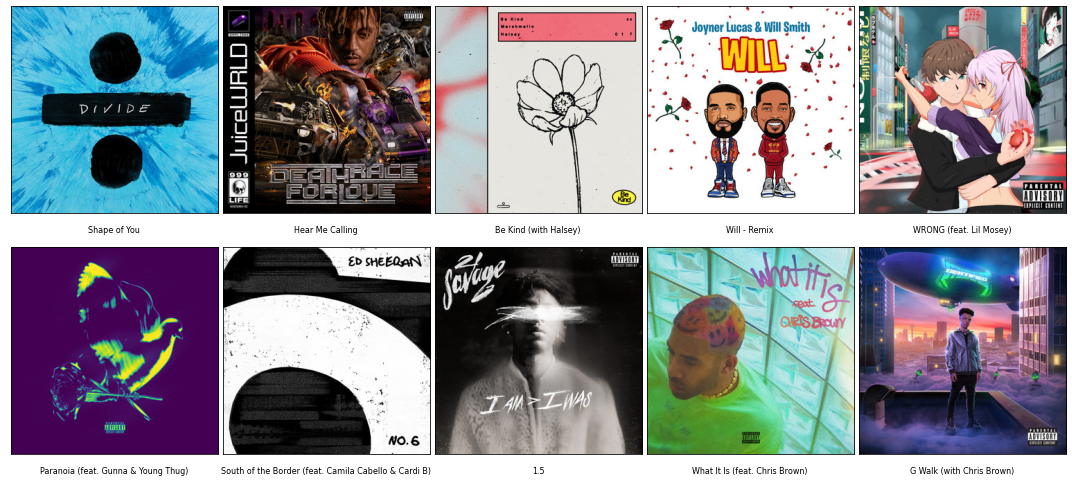

In [87]:
recomendador('Ed Sheeran - Shape of You')

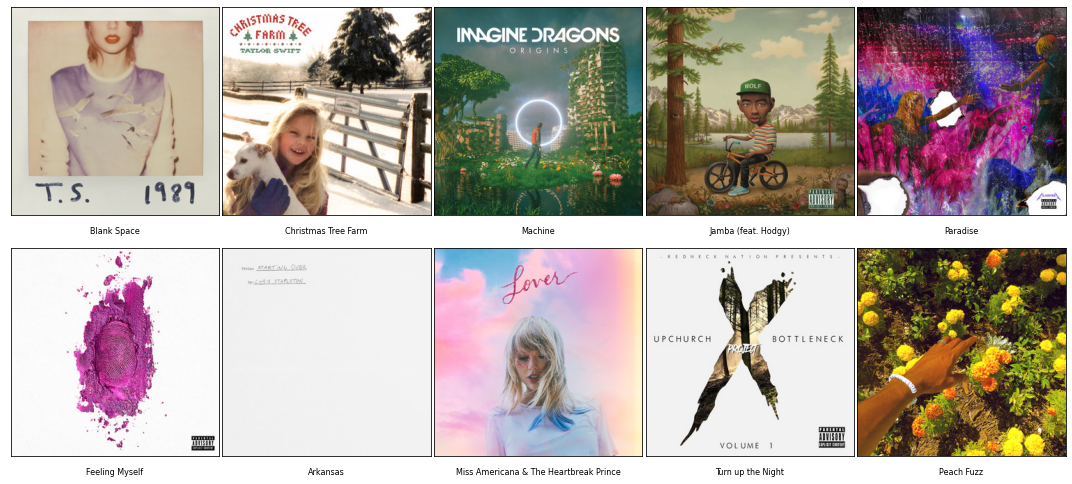

In [88]:
recomendador('Taylor Swift - Blank Space')